In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

import astropy.coordinates as coord
import astropy.units as u

import gala.dynamics as gd
import gala.potential as gp
from gala.units import galactic, solarsystem, dimensionless

#jupyter nbconvert --to webpdf --allow-chromium-download practica_1.ipynb

In [2]:
#Milky Way model recommended
mw = gp.MilkyWayPotential()

xyz = [-8, 0, 0]
#mw.energy(xyz)
mw.acceleration(xyz)

E = mw.energy(xyz)
E.to((u.km/u.s)**2)
acc = mw.acceleration(xyz)
acc.to(u.km/u.s / u.Myr)  

<Quantity [[ 6.86666358],
           [-0.        ],
           [-0.        ]] km / (Myr s)>

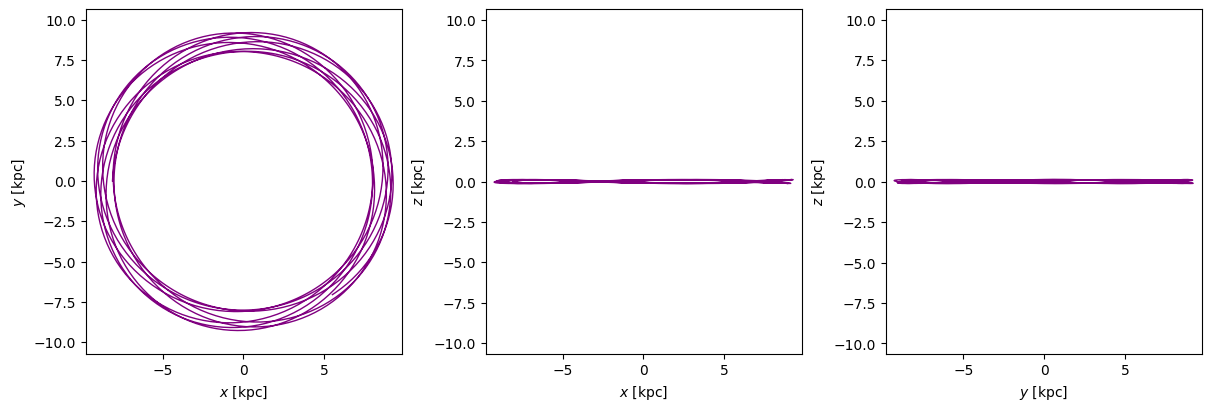

In [3]:
w0 = gd.PhaseSpacePosition(pos=[-8.1,0,0.02]*u.kpc, vel=[13,245,8.]*u.km/u.s)

orbit = mw.integrate_orbit(w0, dt=1*u.Myr, t1=0, t2=2*u.Gyr)  #Use Leapfrog integration by defaultfig

fig = orbit.plot(color='purple', lw=1)

#### Seleccionar las componentes de un potencial gravitatorio adecuado para una galaxia L* del tipo tardío. Qué componentes principales debemos elegir? (Obviar perturbaciones de segundo orden)
#### Definir sus propios parámetros!

In [241]:
#Andromeda Model https://academic.oup.com/mnras/article/528/2/2653/7512223
tot_mass = 1e13*u.Msun
0.5*tot_mass

dm_halo = gp.NFWPotential(m=0.85*tot_mass, r_s=300.*u.kpc, units=galactic) #r_s: la marca de la caida en la densidad del halo
bulge = gp.HernquistPotential(m=0.05*tot_mass, c=3, units=galactic)
disk = gp.MiyamotoNagaiPotential(m=0.10*tot_mass, a=2.5*u.kpc, b=0.28*u.kpc, units=galactic)

gal = dm_halo + disk + bulge

In [242]:
r_grid = np.linspace(0.1, 300, 100)
xyz = np.zeros((3,) + r_grid.shape)
xyz[0] = r_grid

v_mw = mw.circular_velocity(xyz)

v_dmHalo = dm_halo.circular_velocity(xyz)
v_buldge = bulge.circular_velocity(xyz)
v_disk = disk.circular_velocity(xyz)
v_gal = gal.circular_velocity(xyz)

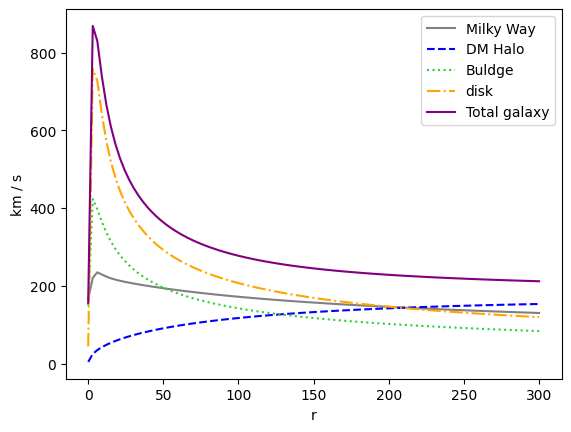

In [243]:

fig = plt.figure()
#gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(111)
ax.plot(r_grid, v_mw, color='gray', alpha=1, label='Milky Way')
ax.plot(r_grid, v_dmHalo, '--', c='blue', label='DM Halo')
ax.plot(r_grid, v_buldge, ':', c='limegreen', label='Buldge')
ax.plot(r_grid, v_disk, '-.', c='orange', label='disk')
ax.plot(r_grid, v_gal, '-', c='purple', label='Total galaxy')
ax.set_xlabel('r')
ax.set_ylabel(v_dmHalo.unit)
plt.legend()

In [244]:
ics = gd.PhaseSpacePosition(pos=[20,69,0.] * u.kpc, vel=[0,200,0] * u.km/u.s)
orbit = gp.Hamiltonian(dm_halo).integrate_orbit(ics, dt=2, n_steps=2000)

norbits = 100

new_pos = np.random.normal(ics.pos.xyz.to(u.pc).value, 100, size=(norbits,3)).T * u.pc
new_vel = np.random.normal(ics.vel.d_xyz.to(u.km/u.s).value, 1., size=(norbits,3)).T * u.km/u.s
new_ics = gd.PhaseSpacePosition(pos=new_pos, vel=new_vel)
orbits = gp.Hamiltonian(dm_halo).integrate_orbit(new_ics, dt=2., n_steps=2000)

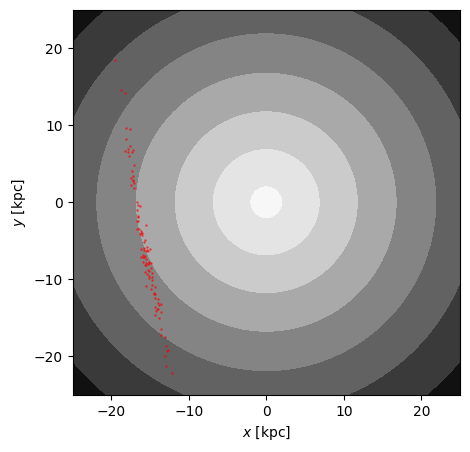

In [245]:
grid = np.linspace(-25,25,65)
fig,ax = plt.subplots(1, 1, figsize=(5,5))
fig = dm_halo.plot_contours(grid=(grid,grid,0), cmap='Greys', ax=ax)
fig = orbits[-1].plot(['x', 'y'], color='red', s=3., alpha=0.5, axes=[ax], auto_aspect=False)

#### Utilizando solo el potencial esferico asociado al halo de materia oscura, elegir condiciones iniciales para órbitas
##### a) Cerrada (E < 0 km/seg2)
##### b) Hiperbólica (E > 0 km/seg2)

#### Para cada una de estas órbitas, calcular el apocentro, pericentro y eccentricidad
#### Comparar orbitas y discutir. ¿Qué ocurrio con cada una de ellas?

In [264]:
w0_open = gd.PhaseSpacePosition(pos=[100, 80, -90] * u.kpc, vel=[-290,-150,300] * u.km/u.s)
w0_clos = gd.PhaseSpacePosition(pos=[15, 0, 2] * u.kpc, vel=[0,53.425,0] * u.km/u.s)


orbit_o = dm_halo.integrate_orbit(w0_open, dt=1*u.Myr, t1=0, t2=5*u.Gyr)
orbit_c = dm_halo.integrate_orbit(w0_clos, dt=1*u.Myr, t1=0, t2=5*u.Gyr)

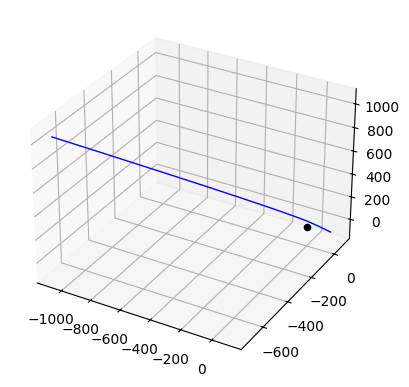

In [265]:
fig = plt.figure(figsize=(20,20))

gs = gridspec.GridSpec(3, 8)
ax = fig.add_subplot(gs[:2, :2],projection='3d')
ax.plot(orbit_o.x, orbit_o.y, orbit_o.z, c='blue', lw=1)
ax.scatter(0, 0, 0, color='black',label='Centro galactico')

Text(0, 0.5, 'y [kpc]')

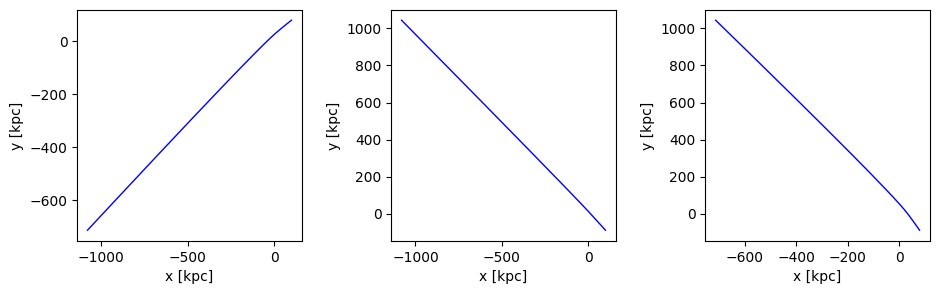

In [266]:
fig = plt.figure(figsize=(11,3))
plt.subplots_adjust(wspace=0.4)

ax = fig.add_subplot(131)
ax.plot(orbit_o.x, orbit_o.y,c='blue', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(132)
ax.plot(orbit_o.x, orbit_o.z,c='blue', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(133)
ax.plot(orbit_o.y, orbit_o.z,c='blue', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

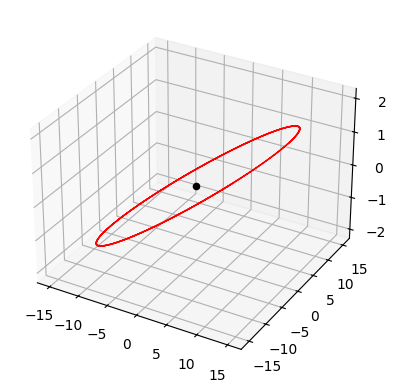

In [267]:
fig = plt.figure(figsize=(20,20))

gs = gridspec.GridSpec(3, 8)
ax = fig.add_subplot(gs[:2, :2],projection='3d')
ax.plot(orbit_c.x, orbit_c.y, orbit_c.z, c='red', lw=1)
ax.scatter(0, 0, 0, color='black',label='Centro galactico')

Text(0, 0.5, 'z [kpc]')

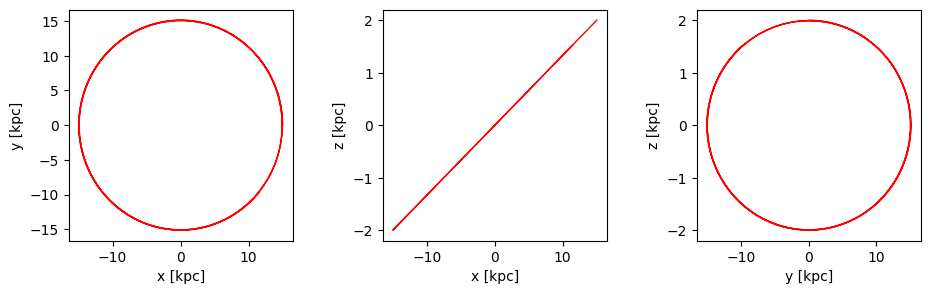

In [268]:
fig = plt.figure(figsize=(11,3))
plt.subplots_adjust(wspace=0.4)

ax = fig.add_subplot(131)
ax.plot(orbit_c.x, orbit_c.y,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(132)
ax.plot(orbit_c.x, orbit_c.z,c='red', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(133)
ax.plot(orbit_c.y, orbit_c.z,c='red', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

#### Integrar esas órbitas, agregando de forma iterativa, las componentes del potencial;
##### e.g., 1ero: solo DM halo, 2do: DM halo + additional component, etc.

In [269]:
pot_1 = dm_halo
pot_2 = dm_halo + disk
pot_3 = dm_halo + disk + bulge

orbit_1 = pot_1.integrate_orbit(w0_open, dt=1*u.Myr, t1=0, t2=2*u.Gyr)
orbit_2 = pot_2.integrate_orbit(w0_open, dt=1*u.Myr, t1=0, t2=2*u.Gyr)
orbit_3 = pot_3.integrate_orbit(w0_open, dt=1*u.Myr, t1=0, t2=2*u.Gyr)

In [270]:
E_1 = r'Energy: {:.3f} $km^2/s^2$'.format(orbit_1.energy()[0].to(u.km**2/u.s**2).value)
E_2 = r'Energy: {:.3f} $km^2/s^2$'.format(orbit_2.energy()[0].to(u.km**2/u.s**2).value)
E_3 = r'Energy: {:.3f} $km^2/s^2$'.format(orbit_3.energy()[0].to(u.km**2/u.s**2).value)

P_1 = 'Precicentro: {:.3f}'.format(orbit_1.pericenter().value)
P_2 = 'Precicentro: {:.3f}'.format(orbit_2.pericenter().value)
P_3 = 'Precicentro: {:.3f}'.format(orbit_3.pericenter().value)

A_1 = 'Apocentro: {:.3f}'.format(orbit_1.apocenter().value)
A_2 = 'Apocentro: {:.3f}'.format(orbit_2.apocenter().value)
A_3 = 'Apocentro: {:.3f}'.format(orbit_3.apocenter().value)

e_1 = 'Excentricidad: {:.3f}'.format(orbit_1.eccentricity().value)
e_2 = 'Excentricidad: {:.3f}'.format(orbit_2.eccentricity().value)
e_3 = 'Excentricidad: {:.3f}'.format(orbit_3.eccentricity().value)

Text(0.05, 0.5, 'Potencial del\n DM Halo + Disk + Bulge: \nEnergy: -40467.856 $km^2/s^2$\nPrecicentro: 14.298\nApocentro: nan\nExcentricidad: nan')

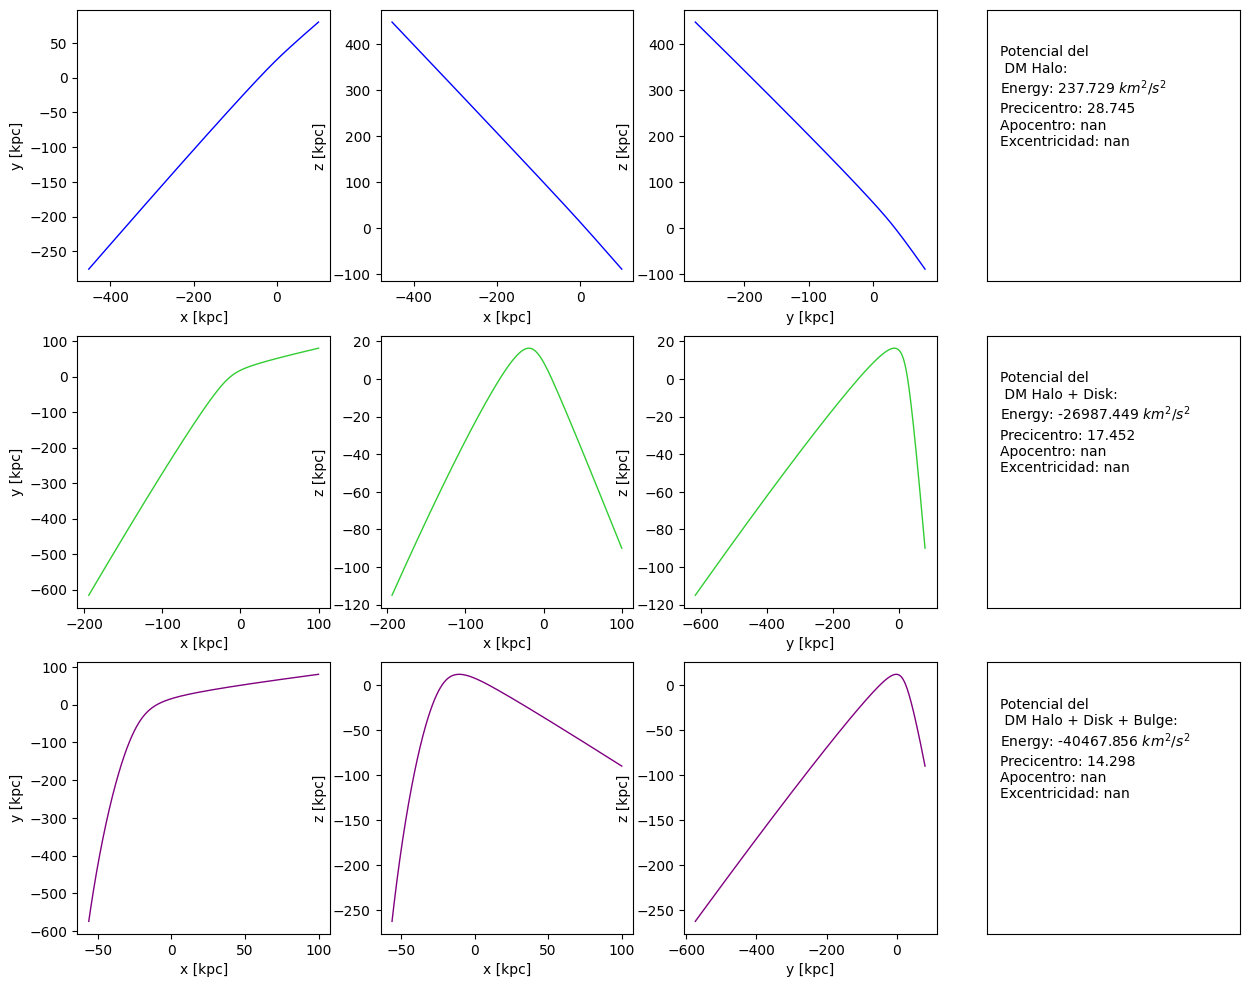

In [271]:
fig = plt.figure(figsize=(15,12))

ax = fig.add_subplot(341)
ax.plot(orbit_1.x, orbit_1.y,c='blue', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(342)
ax.plot(orbit_1.x, orbit_1.z,c='blue', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(343)
ax.plot(orbit_1.y, orbit_1.z,c='blue', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(344)
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')
ax.text(0.05, 0.5, 'Potencial del\n DM Halo: \n'+
        E_1+'\n'+
        P_1+'\n'+
        A_1+'\n'+
        e_1, fontsize=10, ha='left')

#---------------------

ax = fig.add_subplot(345)
ax.plot(orbit_2.x, orbit_2.y,c='limegreen', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(346)
ax.plot(orbit_2.x, orbit_2.z,c='limegreen', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(347)
ax.plot(orbit_2.y, orbit_2.z,c='limegreen', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(348)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.text(0.05, 0.5, 'Potencial del\n DM Halo + Disk: \n'+
        E_2+'\n'+
        P_2+'\n'+
        A_2+'\n'+
        e_2, fontsize=10, ha='left')
#---------------------

ax = fig.add_subplot(349)
ax.plot(orbit_3.x, orbit_3.y,c='purple', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(3,4,10)
ax.plot(orbit_3.x, orbit_3.z,c='purple', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(3,4,11)
ax.plot(orbit_3.y, orbit_3.z,c='purple', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(3,4,12)
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')
ax.text(0.05, 0.5, 'Potencial del\n DM Halo + Disk + Bulge: \n'+
        E_3+'\n'+
        P_3+'\n'+
        A_3+'\n'+
        e_3, fontsize=10, ha='left')

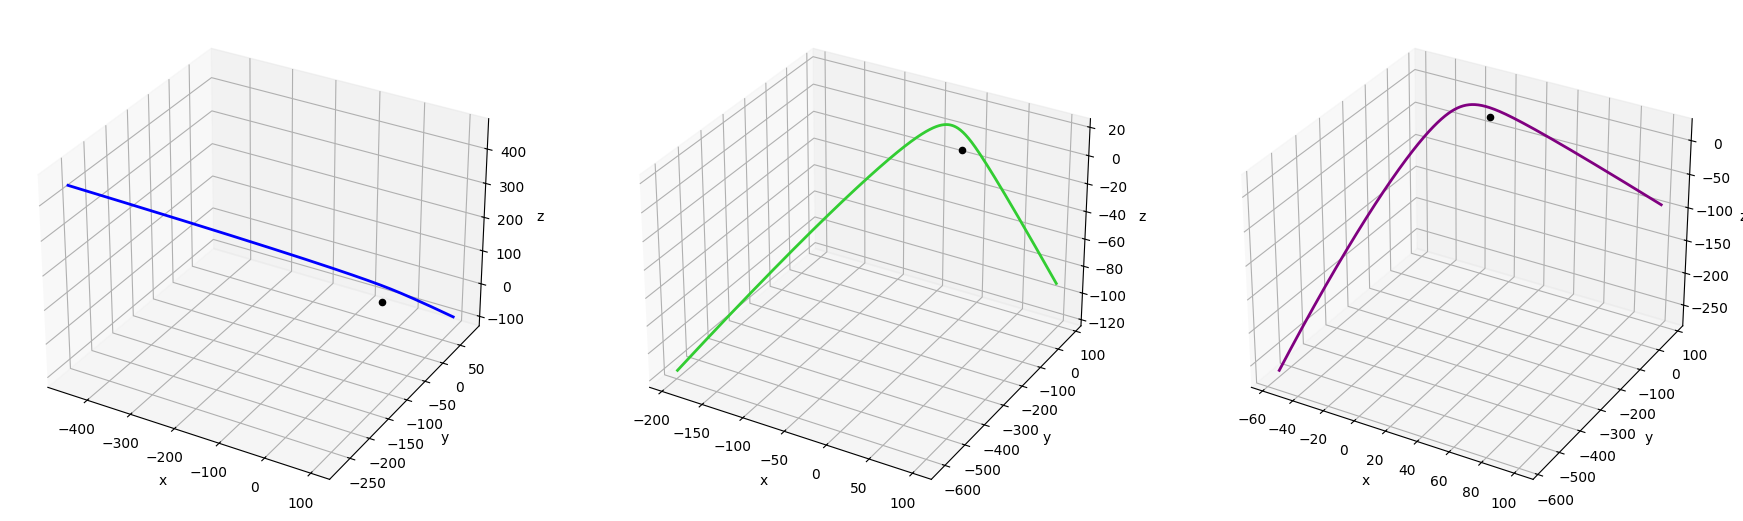

In [272]:
fig = plt.figure(figsize=(22, 7))
gs = fig.add_gridspec(1,3)
colors = ['blue', 'limegreen', 'purple']

for i, (orbit_data, color) in enumerate(zip([orbit_1, orbit_2, orbit_3], colors), start=1):
    ax = fig.add_subplot(gs[i - 1], projection='3d')
    ax.plot(orbit_data.x, orbit_data.y, orbit_data.z, c=color, lw=2)
    ax.scatter(0, 0, 0, color='black', label='Centro galactico')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

In [273]:
orbit_1 = pot_1.integrate_orbit(w0_clos, dt=1*u.Myr, t1=0, t2=2*u.Gyr)
orbit_2 = pot_2.integrate_orbit(w0_clos, dt=1*u.Myr, t1=0, t2=2*u.Gyr)
orbit_3 = pot_3.integrate_orbit(w0_clos, dt=1*u.Myr, t1=0, t2=2*u.Gyr)

In [274]:
E_1 = r'Energy: {:.3f} $km^2/s^2$'.format(orbit_1.energy()[0].to(u.km**2/u.s**2).value)
E_2 = r'Energy: {:.3f} $km^2/s^2$'.format(orbit_2.energy()[0].to(u.km**2/u.s**2).value)
E_3 = r'Energy: {:.3f} $km^2/s^2$'.format(orbit_3.energy()[0].to(u.km**2/u.s**2).value)

P_1 = 'Precicentro: {:.3f}'.format(orbit_1.pericenter().value)
P_2 = 'Precicentro: {:.3f}'.format(orbit_2.pericenter().value)
P_3 = 'Precicentro: {:.3f}'.format(orbit_3.pericenter().value)

A_1 = 'Apocentro: {:.3f}'.format(orbit_1.apocenter().value)
A_2 = 'Apocentro: {:.3f}'.format(orbit_2.apocenter().value)
A_3 = 'Apocentro: {:.3f}'.format(orbit_3.apocenter().value)

e_1 = 'Excentricidad: {:.3f}'.format(orbit_1.eccentricity().value)
e_2 = 'Excentricidad: {:.3f}'.format(orbit_2.eccentricity().value)
e_3 = 'Excentricidad: {:.3f}'.format(orbit_3.eccentricity().value)

Text(0.05, 0.5, 'Potencial del\n DM Halo + Disk + Bulge: \nEnergy: -510590.662 $km^2/s^2$\nPrecicentro: 0.739\nApocentro: 6.515\nExcentricidad: 0.796')

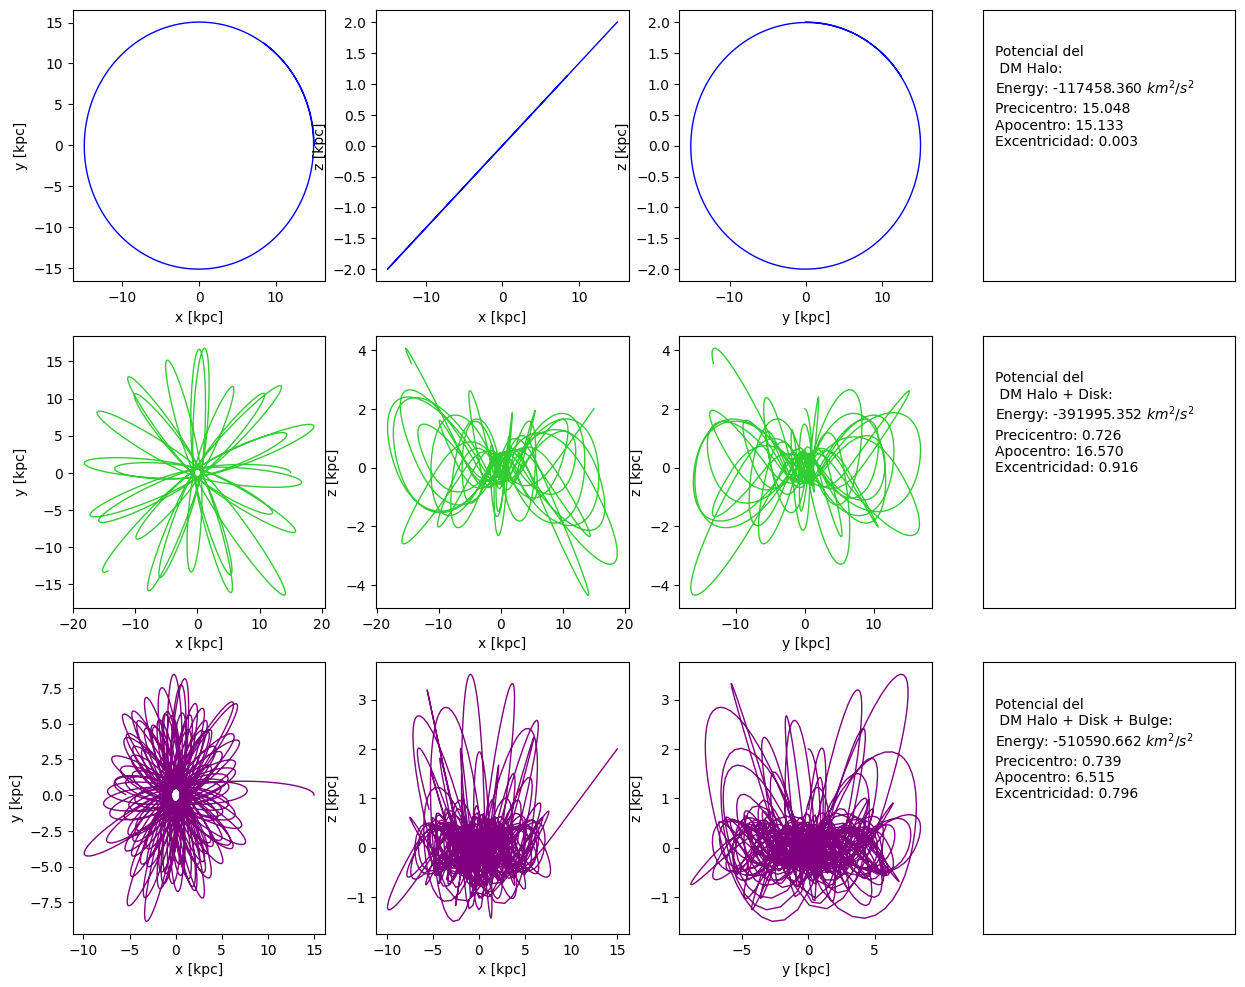

In [275]:
fig = plt.figure(figsize=(15,12))

ax = fig.add_subplot(341)
ax.plot(orbit_1.x, orbit_1.y,c='blue', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(342)
ax.plot(orbit_1.x, orbit_1.z,c='blue', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(343)
ax.plot(orbit_1.y, orbit_1.z,c='blue', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(344)
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')
ax.text(0.05, 0.5, 'Potencial del\n DM Halo: \n'+
        E_1+'\n'+
        P_1+'\n'+
        A_1+'\n'+
        e_1, fontsize=10, ha='left')

#---------------------

ax = fig.add_subplot(345)
ax.plot(orbit_2.x, orbit_2.y,c='limegreen', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(346)
ax.plot(orbit_2.x, orbit_2.z,c='limegreen', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(347)
ax.plot(orbit_2.y, orbit_2.z,c='limegreen', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(348)
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')
ax.text(0.05, 0.5, 'Potencial del\n DM Halo + Disk: \n'+
        E_2+'\n'+
        P_2+'\n'+
        A_2+'\n'+
        e_2, fontsize=10, ha='left')
#---------------------

ax = fig.add_subplot(349)
ax.plot(orbit_3.x, orbit_3.y,c='purple', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax = fig.add_subplot(3,4,10)
ax.plot(orbit_3.x, orbit_3.z,c='purple', lw=1)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(3,4,11)
ax.plot(orbit_3.y, orbit_3.z,c='purple', lw=1)
ax.set_xlabel('y [kpc]')
ax.set_ylabel('z [kpc]')

ax = fig.add_subplot(3,4,12)
ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.set_xlabel('')  # Remove x-axis label
ax.set_ylabel('')
ax.text(0.05, 0.5, 'Potencial del\n DM Halo + Disk + Bulge: \n'+
        E_3+'\n'+
        P_3+'\n'+
        A_3+'\n'+
        e_3, fontsize=10, ha='left')

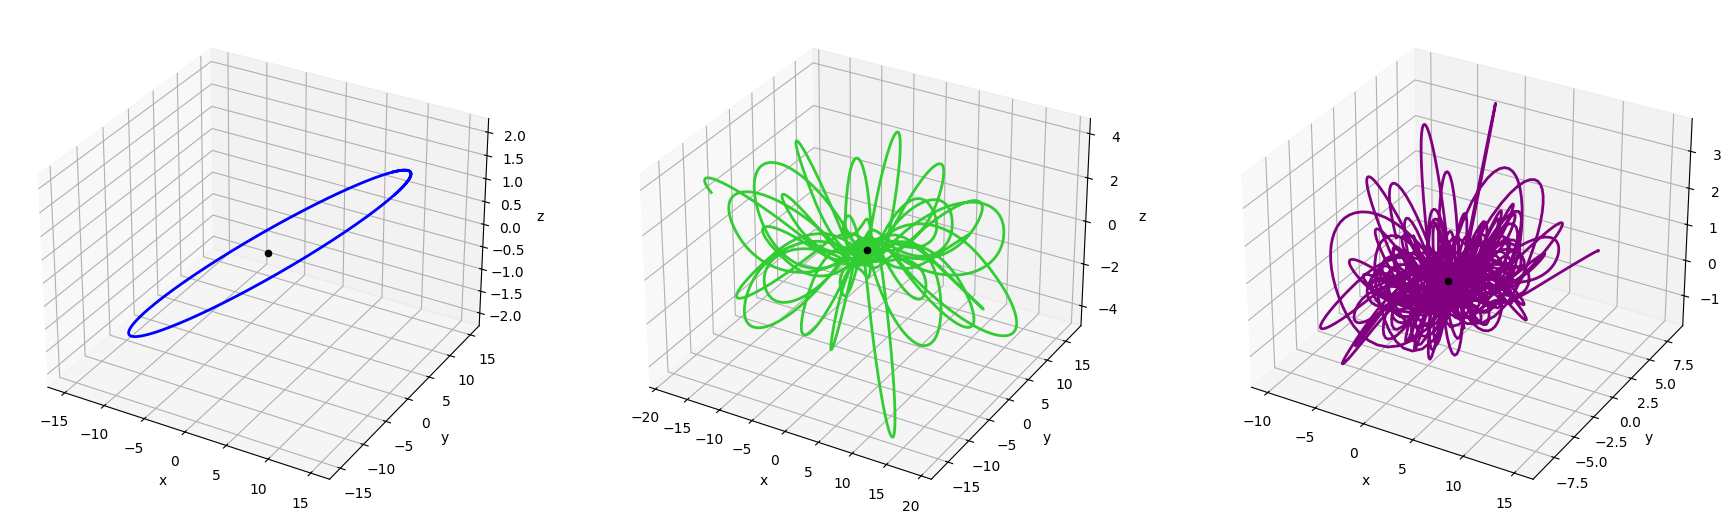

In [276]:
fig = plt.figure(figsize=(22, 7))
gs = fig.add_gridspec(1,3)
colors = ['blue', 'limegreen', 'purple']

for i, (orbit_data, color) in enumerate(zip([orbit_1, orbit_2, orbit_3], colors), start=1):
    ax = fig.add_subplot(gs[i - 1], projection='3d')
    ax.plot(orbit_data.x, orbit_data.y, orbit_data.z, c=color, lw=2)
    ax.scatter(0, 0, 0, color='black', label='Centro galactico')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')